## Step 1: Reading and understanding the data

In [1]:
#First we stop the warnings from displaying recurringly

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import numpy and pandas to perform preliminary tasks

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bikes = pd.read_csv("day.csv")



### Inspecting the dataframe

In [4]:
#Check the head of the dataset

bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bikes.shape

(730, 16)

In [6]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#Renaming some columns to help better visualize and read them later 
bikes.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

### Data Quality Checks

In [9]:
bikes.isnull().sum()

instant       0
dteday        0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
#Copying the dataframe into new so that we can refer to it later when required

bikes_copy = bikes.copy()

In [11]:
#Checking the new dataframe's shape before dropping duplicates. 

bikes_copy.shape

(730, 16)

In [12]:
#Dropping the duplicates

bikes_copy.drop_duplicates(inplace=True)

In [13]:
bikes_copy.shape

(730, 16)

The shape remains the same. This means there were no duplicates in the entires dataframe. Now we go back to working on the original dataframe to drop unwanted columns.

### Dropping unwanted columns and mapping them.

In [14]:
# We may drop 'instant', 'dteday', and the 'casual' and 'registered' columns.
# The first two are not required. And the last two will be covered by out target variable 'cnt'. 

bikes.drop(['instant','dteday','casual','registered'], axis=1,inplace=True)

#Some other variables may also need to be dropped, but we can do that later, after more analysis. 

We now encode/map the variables in the dataframe to make the categorical variables. We do this to be able to better visualize the data.

In [15]:
bikes.month = bikes.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bikes.weekday = bikes.weekday.map({0:'tue',1:'wed',2:'thu',3:'fri',4:'sat',5:'sun',6:'mon'})
bikes.weathersit = bikes.weathersit.map({1:'Clear',2:'Misty',3:'Light_Rain/Snow', 4:'Heavy_Rain/Snow'})
bikes.season = bikes.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [16]:
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [18]:
bikes.shape

(730, 12)

### Checking for outliers

<AxesSubplot:ylabel='windspeed'>

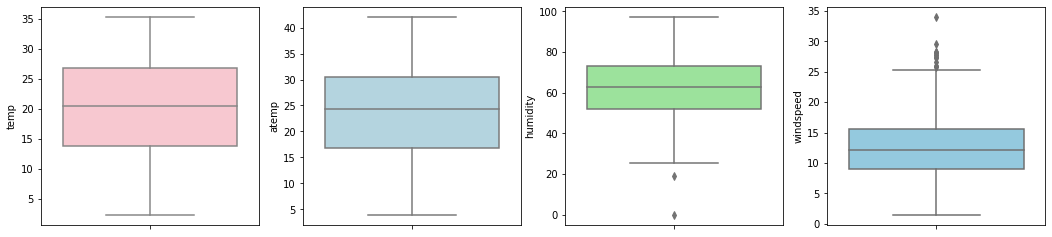

In [19]:

plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.boxplot(y = 'temp', data = bikes, color='pink')
plt.subplot(1,4,2)
sns.boxplot(y = 'atemp', data = bikes, color='lightblue')
plt.subplot(1,4,3)
sns.boxplot(y = 'humidity', data = bikes, color='lightgreen')
plt.subplot(1,4,4)
sns.boxplot(y = 'windspeed', data = bikes, color='skyblue')

We use Tukey's rule to detect outliers. Outliers are values that are on either on the lower or upper side of 1.5 times the inter-quartile region. The IQR = Q3 - Q1. We can see that humidity and windspeed do have outliers. Let's check for both.


In [20]:
bikes.humidity.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: humidity, dtype: float64

In [21]:
# Checking outliers for humidity
bikes.humidity.quantile(0.25)
bikes.humidity.quantile(0.75)
Q1 = bikes.humidity.quantile(0.25)
Q3 = bikes.humidity.quantile(0.75)
IQR = Q3 - Q1
IQR

20.989575000000002

In [22]:
lower_limit_humidity = Q1 - (1.5 * IQR)
upper_limit_humidity = Q3 + (1.5 * IQR)

lower_limit_humidity, upper_limit_humidity



(20.515637499999997, 104.4739375)

In [23]:
outliers_humidity_low = (bikes['humidity'] < lower_limit_humidity)
outliers_humidity_high = (bikes['humidity'] > upper_limit_humidity)



In [24]:
len(bikes.humidity) - (len(bikes['humidity'][outliers_humidity_low]) + len(bikes['humidity'][outliers_humidity_high]))

728

The original length of humidity column (as of the entire dataframe) was 730. Two low outliers were found. Now we drop them. 

In [25]:
bikes.humidity[~(outliers_humidity_low | outliers_humidity_high)]

0      80.5833
1      69.6087
2      43.7273
3      59.0435
4      43.6957
        ...   
725    65.2917
726    59.0000
727    75.2917
728    48.3333
729    57.7500
Name: humidity, Length: 728, dtype: float64

In [26]:
bikes = bikes[~(outliers_humidity_low | outliers_humidity_high)]

In [27]:
bikes.shape

(728, 12)

In [28]:
#Now we do the same for the windspeed column. 

In [29]:
bikes.windspeed.describe()

count    728.000000
mean      12.727880
std        5.139840
min        1.500244
25%        9.031466
50%       12.125057
75%       15.624735
max       29.584721
Name: windspeed, dtype: float64

In [30]:
# Checking outliers for windspeed
bikes.windspeed.quantile(0.25)
bikes.windspeed.quantile(0.75)
Q1 = bikes.windspeed.quantile(0.25)
Q3 = bikes.windspeed.quantile(0.75)
IQR_W = Q3 - Q1
IQR_W

6.593268999999999

In [31]:
lower_limit_windspeed = Q1 - (1.5 * IQR)
upper_limit_windspeed = Q3 + (1.5 * IQR)

lower_limit_windspeed, upper_limit_windspeed

#The lower limit is clearly less than the minimum value, and the upper limit clearly more than the max. 
#It is obvious from the data above that all windspeed no more has any outliers. 
#We can draw boxplots for both humidity and windspeed to check again

(-22.4528965, 47.109097500000004)

<AxesSubplot:ylabel='windspeed'>

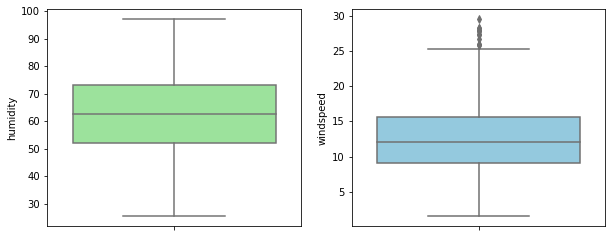

In [32]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(y = 'humidity', data = bikes, color='lightgreen')
plt.subplot(1,2,2)
sns.boxplot(y = 'windspeed', data = bikes, color='skyblue')

In [33]:
bikes.shape

#In the end analysis, we ended up dropping only two rows after finding outliers. Now we continue with data visualization.

(728, 12)




## Step 2: EDA and Visualizing the Data

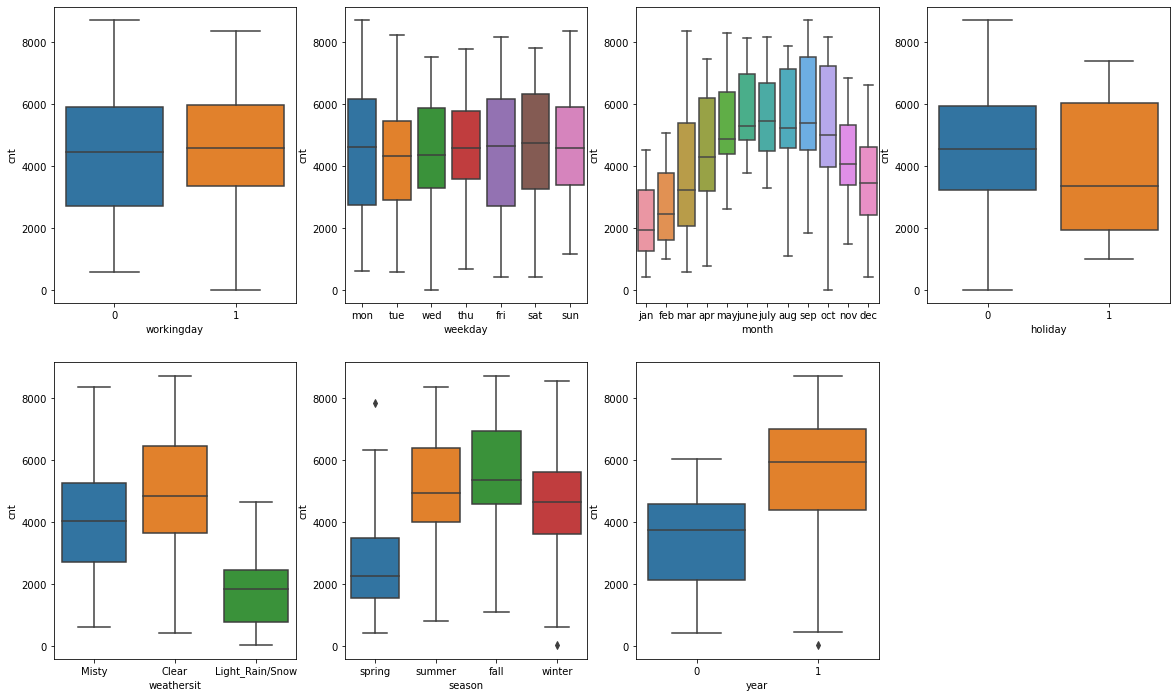

In [34]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(2,4,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'cnt', data = bikes)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = bikes)
plt.show()

We can make a few observations here:
1. The status of the working day does not affect the target variable (cnt) much. 
2. There is no significant variation between days of the week.
3. The months of Nov, Dec, Jan and Feb have a much lower count (cnt) than other months. 
4. There is less demand for bikes during light rain or snow and zero demand during heavy rain or snow. 
5. Spring sees the least demand for bikes, while fall the highest. 

We also create pairplots with categorical variables to understand correlations.

The first plot below shows pairplots between different variables, where the hue is set to year (blue is 2019, orange is 2019)
The second plot shows the same pairplots without the hue. We refer to the second plot to check linear correlations.

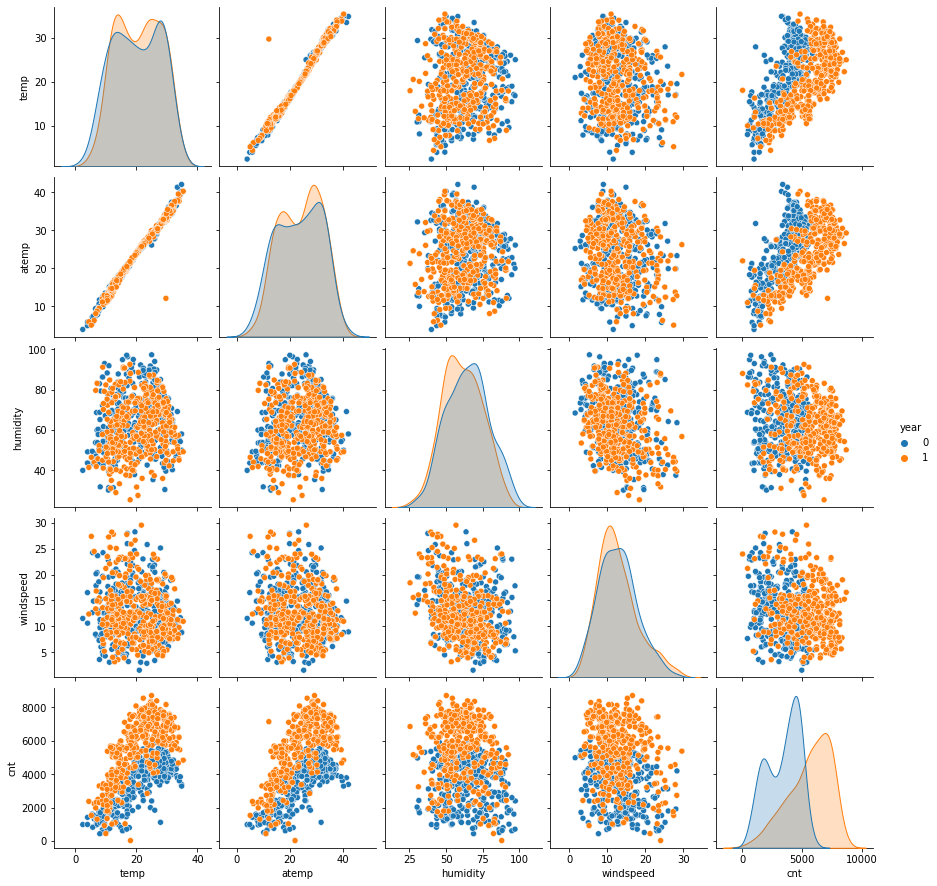

In [35]:
sns.pairplot(data=bikes,vars=['temp','atemp','humidity','windspeed','cnt'], hue='year')

plt.show()

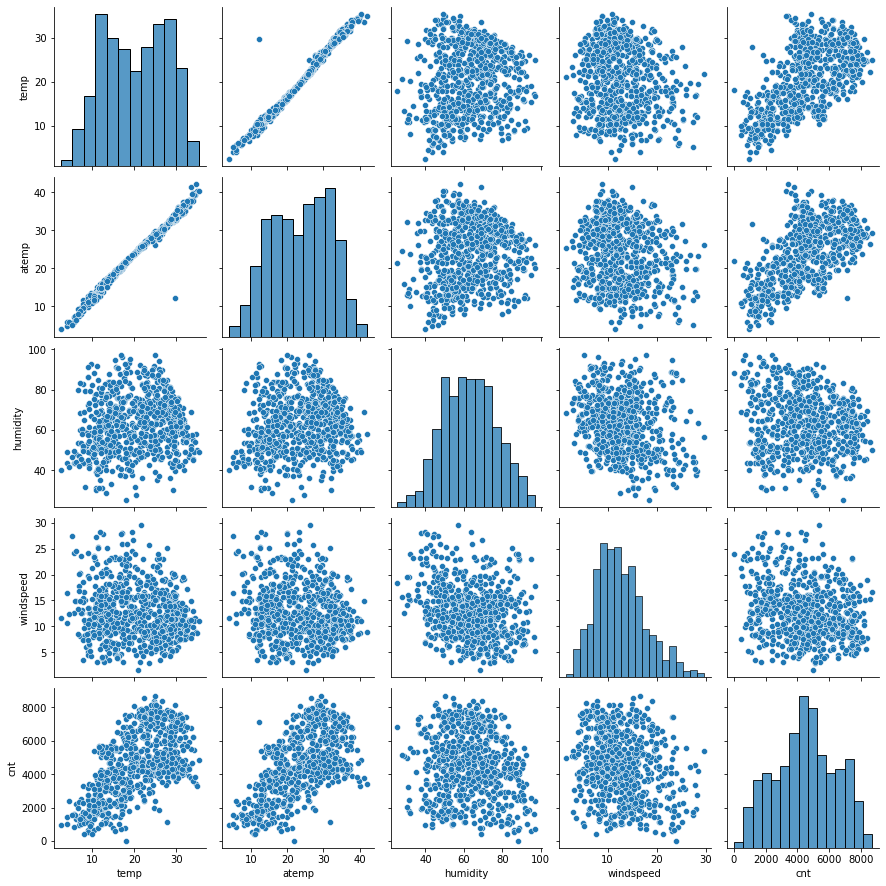

In [36]:
sns.pairplot(data=bikes,vars=['temp','atemp','humidity','windspeed','cnt'])

plt.show()

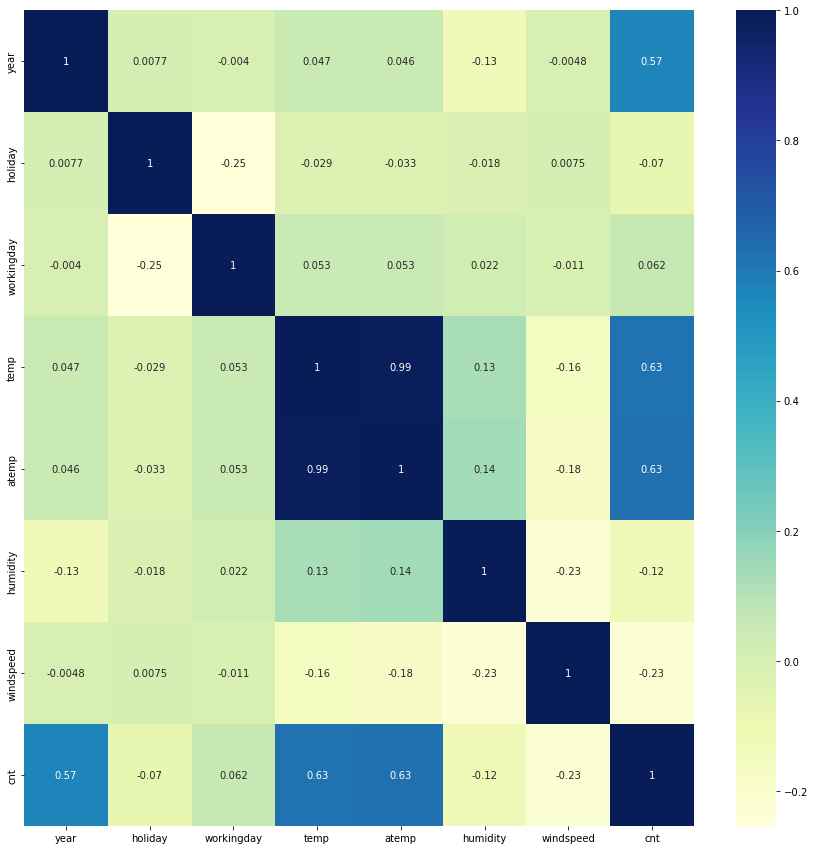

In [37]:
plt.figure(figsize = (15,15))
sns.heatmap(bikes.corr(), annot = True, cmap="YlGnBu")
plt.show()


There is a clear correlation between temp and atemp. Since both of these are so closely related, we should not use both of them due to problems associated with multicolinearity. However, instead of dropping either of these now, let's wait and do a statistical analysis first. We shall dropped either of these based on VIF and p-values. 

## Step 3: Data Preparation

First, we create dummy variables for columns month, weekday, weathersit, and season. 

### Creating dummies

In [38]:
dummy_months = pd.get_dummies(bikes.month,drop_first=True)
dummy_weekdays = pd.get_dummies(bikes.weekday,drop_first=True)
dummy_weathersit = pd.get_dummies(bikes.weathersit,drop_first=True)
dummy_seasons = pd.get_dummies(bikes.season,drop_first=True)

In [39]:
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [40]:
#We merge the dummies with our dataframe

bikes_new = pd.concat([bikes,dummy_months,dummy_weekdays,dummy_weathersit,dummy_seasons],axis=1)

In [41]:
bikes_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_Rain/Snow,Misty,spring,summer,winter
0,spring,0,jan,0,mon,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [42]:
bikes_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 729
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           728 non-null    object 
 1   year             728 non-null    int64  
 2   month            728 non-null    object 
 3   holiday          728 non-null    int64  
 4   weekday          728 non-null    object 
 5   workingday       728 non-null    int64  
 6   weathersit       728 non-null    object 
 7   temp             728 non-null    float64
 8   atemp            728 non-null    float64
 9   humidity         728 non-null    float64
 10  windspeed        728 non-null    float64
 11  cnt              728 non-null    int64  
 12  aug              728 non-null    uint8  
 13  dec              728 non-null    uint8  
 14  feb              728 non-null    uint8  
 15  jan              728 non-null    uint8  
 16  july             728 non-null    uint8  
 17  june            

### Dropping unnecessary columns: 

In [43]:
bikes_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bikes_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_Rain/Snow,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
bikes_new.shape

(728, 30)

In [45]:
bikes_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             728 non-null    int64  
 1   holiday          728 non-null    int64  
 2   workingday       728 non-null    int64  
 3   temp             728 non-null    float64
 4   atemp            728 non-null    float64
 5   humidity         728 non-null    float64
 6   windspeed        728 non-null    float64
 7   cnt              728 non-null    int64  
 8   aug              728 non-null    uint8  
 9   dec              728 non-null    uint8  
 10  feb              728 non-null    uint8  
 11  jan              728 non-null    uint8  
 12  july             728 non-null    uint8  
 13  june             728 non-null    uint8  
 14  mar              728 non-null    uint8  
 15  may              728 non-null    uint8  
 16  nov              728 non-null    uint8  
 17  oct             

## Step 4: Splitting the Data into Training and Test Sets

In [46]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
bikes_train, bikes_test = train_test_split(bikes_new, train_size = 0.7, random_state = 100)

In [47]:
print("Train shape:", bikes_train.shape, "Test shape:", bikes_test.shape)

Train shape: (509, 30) Test shape: (219, 30)


In [48]:
#We use the MinMax Scaler to scale the variables so that they are easily interpretable. 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [49]:
bikes_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_Rain/Snow,Misty,spring,summer,winter
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,0,1,...,0,0,0,1,0,0,0,1,0,0
481,1,0,1,18.757500,22.63185,40.0833,23.291411,6233,0,0,...,0,1,0,0,0,0,0,0,1,0
113,0,0,0,23.848347,27.58815,81.0833,12.875725,4191,0,0,...,0,0,0,1,0,0,1,0,1,0
629,1,0,0,26.650000,30.52440,64.6667,19.000061,8395,0,0,...,0,0,0,0,0,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
#We apply the scalar transformation to the required columns. 
#These are temp, atemp, humidity, windspeed, and cnt. 

var_trans = ['temp','atemp','humidity','windspeed','cnt']
bikes_train[var_trans] = scaler.fit_transform(bikes_train[var_trans])

Looking at the scaled dataset and using '.describe' to view statistics. 

In [51]:
bikes_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_Rain/Snow,Misty,spring,summer,winter
728,1,0,0,0.245101,0.204242,0.319025,0.772556,0.204096,0,1,...,0,0,0,1,0,0,0,1,0,0
481,1,0,1,0.496388,0.499889,0.204176,0.764739,0.714565,0,0,...,0,1,0,0,0,0,0,0,1,0
113,0,0,0,0.651106,0.632534,0.774941,0.375373,0.479636,0,0,...,0,0,0,1,0,0,1,0,1,0
629,1,0,0,0.736253,0.711117,0.546404,0.604317,0.963300,0,0,...,0,0,0,0,0,0,0,0,0,0
535,1,0,1,0.901354,0.858965,0.470417,0.179101,0.712034,0,0,...,0,0,0,0,0,0,0,0,1,0


In [52]:
bikes_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_Rain/Snow,Misty,spring,summer,winter
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,0.506876,0.031434,0.679764,0.537164,0.521667,0.529901,0.374965,0.512550,0.092338,0.090373,...,0.131631,0.153242,0.127701,0.145383,0.157171,0.031434,0.359528,0.241650,0.245580,0.253438
std,0.500445,0.174660,0.467026,0.226375,0.215665,0.199051,0.195571,0.224155,0.289787,0.286998,...,0.338421,0.360575,0.334085,0.352833,0.364320,0.174660,0.480334,0.428505,0.430854,0.435408
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336479,0.328412,0.383410,0.230522,0.355844,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.533770,0.530326,0.527262,0.353572,0.516452,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736253,0.703523,0.669954,0.487485,0.678900,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


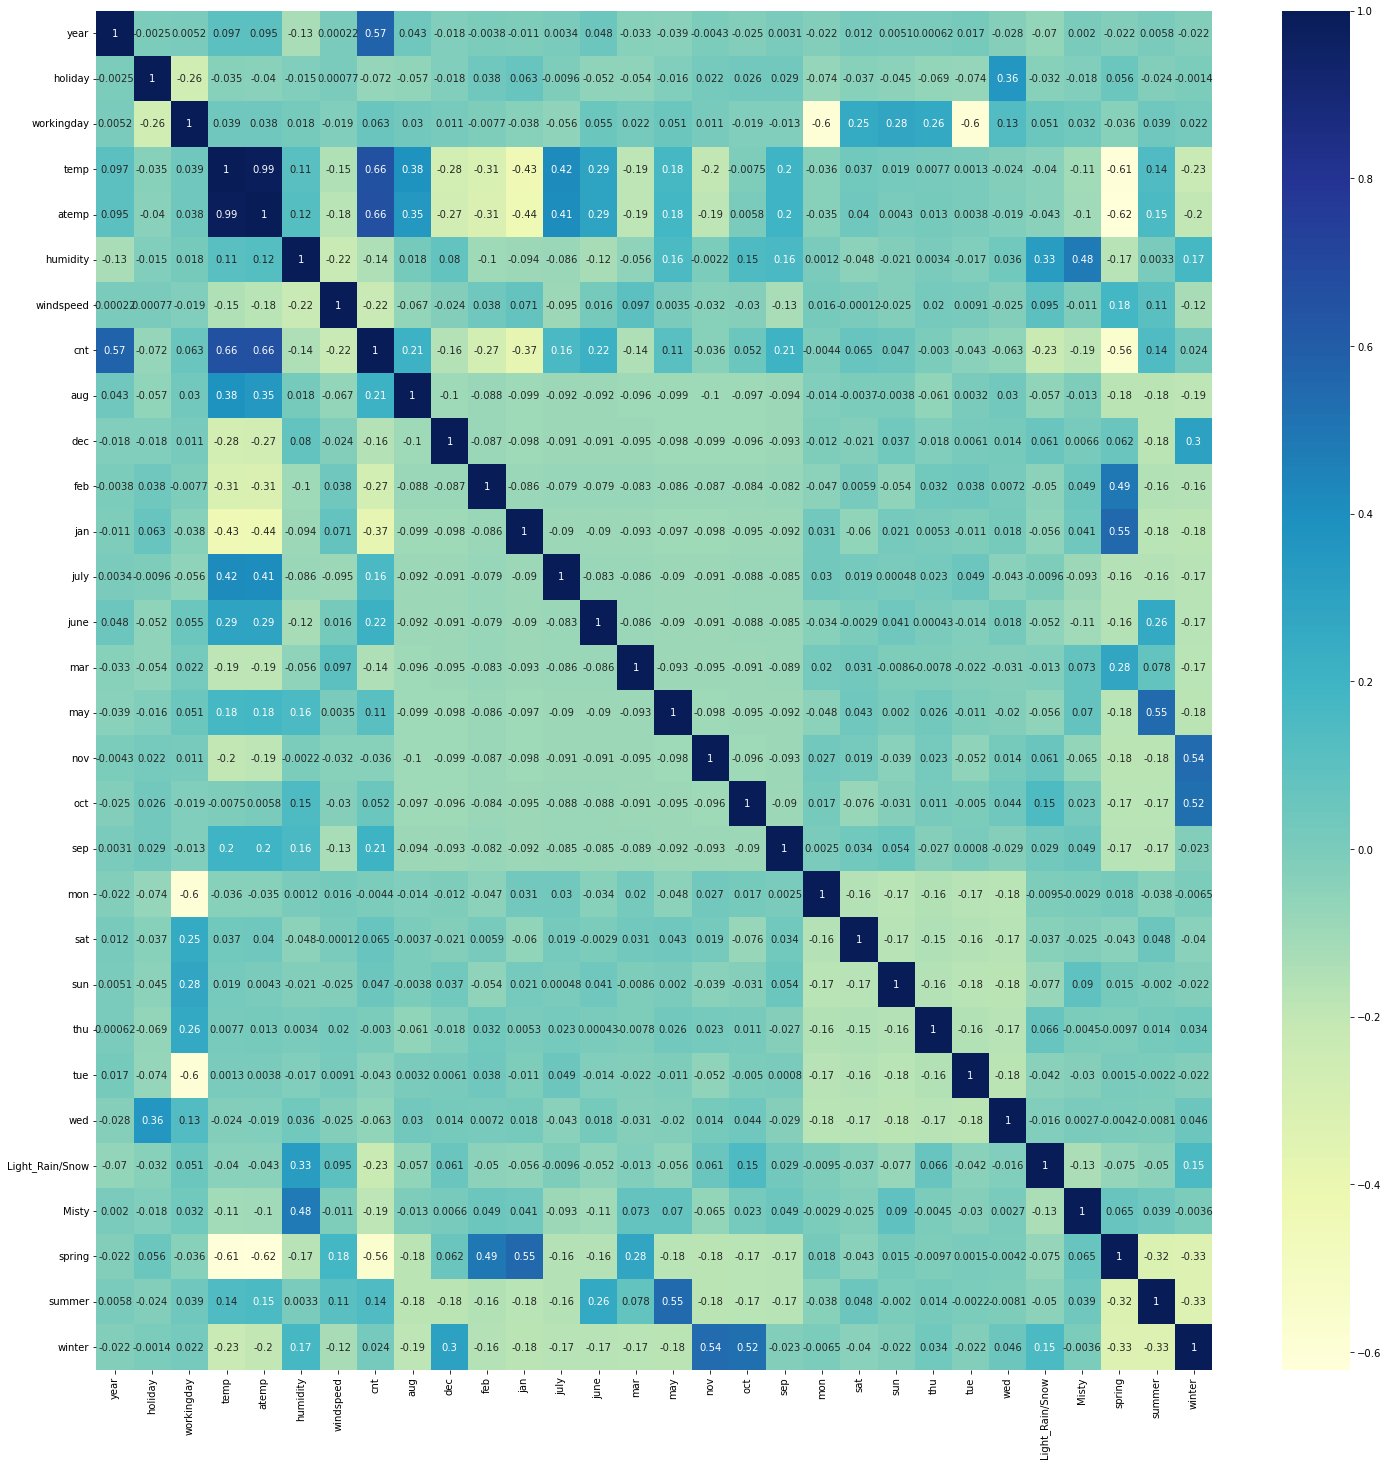

In [53]:
plt.figure(figsize = (25,25))
sns.heatmap(bikes_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Some correlations can be seen here, and some appear to have no correlations. We shall confirm these with the linear regression model. 

## Step 5: Building Linear Regression Models

In [54]:
#Creating X and y variables

y_train = bikes_train.pop('cnt')
X_train = bikes_train

In [55]:
#Importing all the libraries we will now require first

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [56]:
#Recursive feature elimination

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [57]:
#Cutting down number of features to 15

rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [58]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', False, 4),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 14),
 ('dec', False, 6),
 ('feb', False, 8),
 ('jan', False, 7),
 ('july', True, 1),
 ('june', False, 11),
 ('mar', True, 1),
 ('may', True, 1),
 ('nov', False, 2),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', True, 1),
 ('sat', False, 15),
 ('sun', False, 13),
 ('thu', False, 10),
 ('tue', False, 5),
 ('wed', False, 3),
 ('Light_Rain/Snow', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1)]

In [59]:
#Selecting variables that have RFE support 

col = X_train.columns[rfe.support_]
col

Index(['year', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'july',
       'mar', 'may', 'sep', 'mon', 'Light_Rain/Snow', 'Misty', 'spring',
       'winter'],
      dtype='object')

In [60]:
X_train.columns[~rfe.support_] #These columns have been rejected.

Index(['holiday', 'aug', 'dec', 'feb', 'jan', 'june', 'nov', 'oct', 'sat',
       'sun', 'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [61]:
#We make a function to calculate VIF now. We make a function because we will need to use the VIF operator several times.

def calculateVIF(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 


In [62]:
#First, we make a variable a dataframe that has only the variables that RFE has selected.

X_train_rfe = X_train[col]

In [63]:
#We can calculate RFE using out above function

calculateVIF(X_train_rfe)

,Features,VIF
2,temp,344.23
3,atemp,344.00
4,humidity,15.12
1,workingday,4.47
5,windspeed,4.45
12,Misty,2.61
13,spring,2.52
14,winter,2.16
0,year,2.09
10,mon,1.71


The variables temp and atemp have a super high VIF score. We make a linear regression model now to eliminate the unrequired variables.

In [64]:
#Building the 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          8.74e-193
Time:                        22:18:14   Log-Likelihood:                 524.22
No. Observations:                 509   AIC:                            -1016.
Df Residuals:                     493   BIC:                            -948.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2484      0.027     

In [65]:
#As atemp has both high P value and a very high VIF score, we drop it

X_train_rfe2 = X_train_rfe.drop(['atemp'], axis = 1)

In [66]:
#Calculate VIF
calculateVIF(X_train_rfe2)

,Features,VIF
3,humidity,14.96
2,temp,13.05
1,workingday,4.47
4,windspeed,4.39
11,Misty,2.60
12,spring,2.52
13,winter,2.11
0,year,2.09
9,mon,1.71
5,july,1.50


In [67]:
#Building the second linear regression model

X_train_lm_2 = sm.add_constant(X_train_rfe2)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     200.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.62e-193
Time:                        22:18:14   Log-Likelihood:                 523.19
No. Observations:                 509   AIC:                            -1016.
Df Residuals:                     494   BIC:                            -952.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2519      0.027     

In [68]:
#Humidity has a very high VIF, so we drop it
X_train_rfe3 = X_train_rfe2.drop(['humidity'], axis = 1)

In [69]:
calculateVIF(X_train_rfe3)

,Features,VIF
2,temp,7.12
1,workingday,4.44
3,windspeed,4.31
0,year,2.06
11,spring,1.99
8,mon,1.69
10,Misty,1.61
12,winter,1.61
4,july,1.46
6,may,1.31


In [70]:
#Building the 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_rfe3)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.66e-189
Time:                        22:18:14   Log-Likelihood:                 509.60
No. Observations:                 509   AIC:                            -991.2
Df Residuals:                     495   BIC:                            -931.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1956      0.025     

In [71]:
#May has a high P value, so we drop it

X_train_rfe4 = X_train_rfe3.drop(['may'], axis = 1)

In [72]:
calculateVIF(X_train_rfe4)

,Features,VIF
2,temp,6.79
1,workingday,4.42
3,windspeed,4.31
0,year,2.06
10,spring,1.94
7,mon,1.69
9,Misty,1.58
11,winter,1.52
4,july,1.38
5,mar,1.21


In [73]:
#Building the 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_rfe4)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.1
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.00e-189
Time:                        22:18:14   Log-Likelihood:                 507.87
No. Observations:                 509   AIC:                            -989.7
Df Residuals:                     496   BIC:                            -934.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2018      0.025     

In [74]:
X_train_rfe5 = X_train_rfe4.drop(['temp'], axis = 1)
calculateVIF(X_train_rfe5)

,Features,VIF
2,windspeed,3.43
1,workingday,3.17
0,year,1.87
9,spring,1.64
8,Misty,1.57
10,winter,1.50
6,mon,1.48
4,mar,1.21
3,july,1.13
5,sep,1.12


In [75]:
X_train_lm_5 = sm.add_constant(X_train_rfe5)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.16e-149
Time:                        22:18:14   Log-Likelihood:                 410.21
No. Observations:                 509   AIC:                            -796.4
Df Residuals:                     497   BIC:                            -745.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5031      0.018     

#### We see that the 4th model is better than the 5th model. Even though the VIF of temp is quite high (while its P value is good and so acceptable), if we remove temp, the model performs really badly. Therefore, we should not drop temp. 

#### This is also obvious from the fact that our data visualization showed a clear correlation between temp and cnt. 

#### Thus, we accept the 4th linear regression model. See summary below:

In [76]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.1
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.00e-189
Time:                        22:18:14   Log-Likelihood:                 507.87
No. Observations:                 509   AIC:                            -989.7
Df Residuals:                     496   BIC:                            -934.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2018      0.025     

#### The above model is our best model. The Durbin-Watson number is 2.036, which indicates no autocorrelation between variables
#### It has a good R-squared and Adj. R-squared value, and all the variables have low p-values.
#### The temp variables does have a VIF of 6.9, but we saw that dropping it makes our model worse. Moreover, VIF of < 10 is stil acceptable, so this should not be a problem at all.
#### F-statistic (high) and the prob F-statistic (almost = 0) are also very acceptable numbers

In [77]:
lr_4.params

const              0.201810
year               0.230323
workingday         0.044471
temp               0.456852
windspeed         -0.096798
july              -0.058825
mar                0.046446
sep                0.064880
mon                0.053216
Light_Rain/Snow   -0.291964
Misty             -0.079599
spring            -0.126241
winter             0.042512
dtype: float64

In [78]:
X_train_lm_4

,const,year,workingday,temp,windspeed,july,mar,sep,mon,Light_Rain/Snow,Misty,spring,winter
728,1.0,1,0,0.245101,0.772556,0,0,0,0,0,0,1,0
481,1.0,1,1,0.496388,0.764739,0,0,0,0,0,0,0,0
113,1.0,0,0,0.651106,0.375373,0,0,0,0,0,1,0,0
629,1.0,1,0,0.736253,0.604317,0,0,1,1,0,0,0,0
535,1.0,1,1,0.901354,0.179101,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,1.0,1,0,0.914852,0.538883,0,0,0,1,0,0,0,0
54,1.0,0,1,0.294718,0.521446,0,0,0,0,0,1,1,0
352,1.0,0,1,0.271061,0.327086,0,0,0,0,0,0,0,1
81,1.0,0,1,0.358646,0.480783,0,1,0,0,0,1,0,0


In [79]:
y_train_pred = lr_4.predict(X_train_lm_4)

Now we check the normality of errors

Text(0.5, 0, 'Errors')

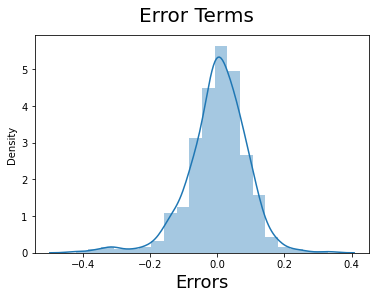

In [80]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Ah, perfect! Seems like the error terms are, indeed, distributed normally. That's reassuring.

In [81]:
calculateVIF(X_train_rfe4)

,Features,VIF
2,temp,6.79
1,workingday,4.42
3,windspeed,4.31
0,year,2.06
10,spring,1.94
7,mon,1.69
9,Misty,1.58
11,winter,1.52
4,july,1.38
5,mar,1.21


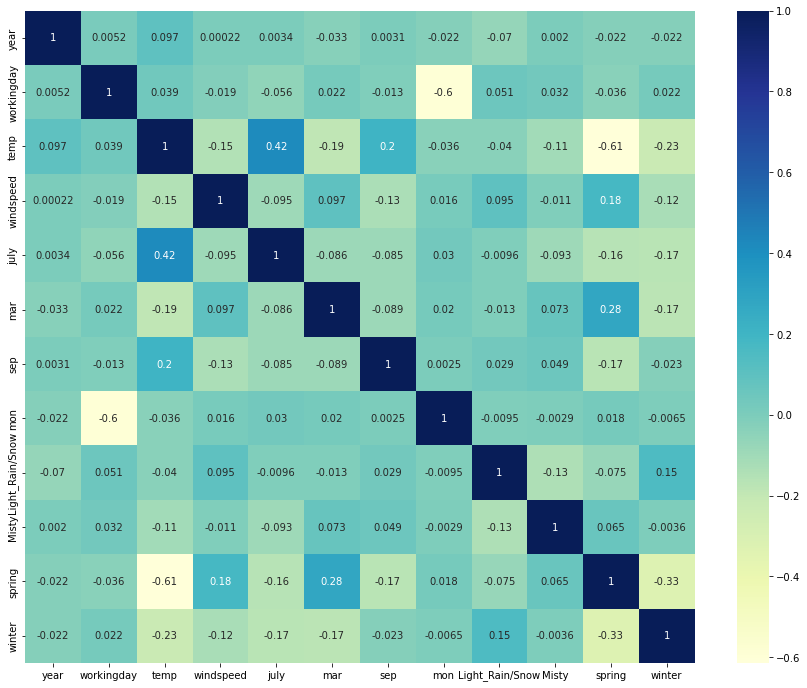

In [82]:
plt.figure(figsize=(15,12))
sns.heatmap(X_train_rfe4.corr(),annot = True, cmap="YlGnBu")
plt.show()

### Checking homoscedasticity

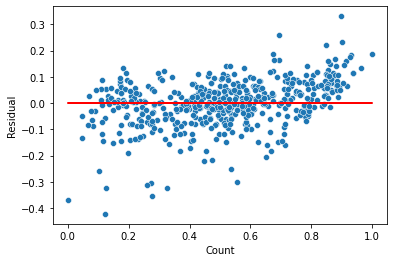

In [83]:
y_train_pred = lr_4.predict(X_train_lm_4)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()


## Step 6: Making Predictions Using the Final Model

Our final model is the 4th model. Now we make predictions using the 4th model.


In [84]:
#Scaling the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
bikes_test[num_vars] = scaler.transform(bikes_test[num_vars])
bikes_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_Rain/Snow,Misty,spring,summer,winter
241,0,0,1,0.722754,0.689995,0.409512,0.207143,0.596180,1,0,...,0,0,1,0,0,0,0,0,0,0
496,1,0,0,0.629300,0.623239,0.314965,0.202447,0.852163,0,0,...,0,0,0,0,0,0,0,0,1,0
449,1,0,1,0.481850,0.481306,0.311485,0.862891,0.636908,0,0,...,0,0,0,0,1,0,0,0,1,0
594,1,0,0,0.771557,0.721264,0.486078,0.339536,0.902324,1,0,...,0,0,0,0,0,0,0,0,0,0
151,0,0,1,0.878510,0.858954,0.588746,0.412734,0.454671,0,0,...,0,0,0,0,0,0,1,0,1,0


In [85]:
bikes_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_Rain/Snow,Misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.488584,0.022831,0.694064,0.560551,0.547691,0.503549,0.357948,0.527927,0.068493,0.073059,...,0.164384,0.118721,0.178082,0.141553,0.114155,0.018265,0.287671,0.251142,0.269406,0.223744
std,0.501015,0.149707,0.461858,0.232600,0.223886,0.182531,0.183809,0.217318,0.253169,0.260830,...,0.371472,0.324202,0.383458,0.349389,0.318728,0.134214,0.453714,0.434663,0.444668,0.417707
min,0.000000,0.000000,0.000000,0.046591,0.026455,0.070765,-0.049874,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.368668,0.368525,0.351877,0.232049,0.380177,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.564921,0.567477,0.499999,0.336405,0.530028,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.774153,0.742802,0.641153,0.450008,0.685918,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.019437,0.954151,0.951690,0.981707,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [87]:
col1 = X_train_rfe4.columns

X_test = X_test[col1]

#Adding the constant
X_test_lm_4 = sm.add_constant(X_test)

In [88]:
y_pred = lr_4.predict(X_test_lm_4)

In [89]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8013

That's a very acceptable r2 value. Our model of coefficients is working well on the test set as well. 

## Step 7: Model Evaluation 

Text(0, 0.5, 'y_pred')

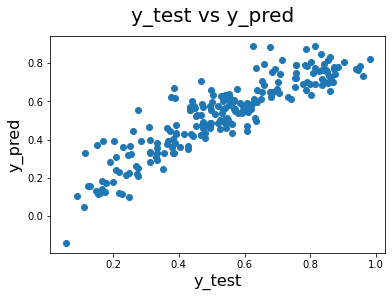

In [90]:
#We plot that y variable of the test set and the prediction 

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 16)
plt.ylabel('y_pred', fontsize = 16) 

In [91]:
round(lr_4.params,3)

const              0.202
year               0.230
workingday         0.044
temp               0.457
windspeed         -0.097
july              -0.059
mar                0.046
sep                0.065
mon                0.053
Light_Rain/Snow   -0.292
Misty             -0.080
spring            -0.126
winter             0.043
dtype: float64

Thus, the equation of our best fitted line is:

*cnt = 0.202 + (0.230 x year) + (0.044 x workingday) + (0.457 x temp) + (-0.097 x windspeed) + (-0.059 x july) + (0.046 x mar) + (0.065 x sep) + (0.053 x mon) + (-0.292 x Light_Rain/Snow) + (-0.080 x Misty) + (-0.126 x spring) + (0.043 x winter)*

In [92]:
#Calculating the adjusted r-squared value

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7897


Finally, now we visualize the fit for the test data by plotting a regression plot.

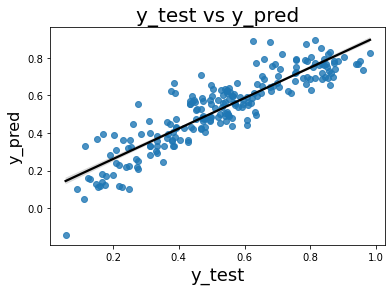

In [93]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True, line_kws={"color": "black"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## Final comparison between the training and the testing datasets:

- Training Dataset's R-squared value (R^2): **0.841**
- Test Dataset's R-squared value (R^2): **0.8013**
- Training Dataset's adj. R-squared value (adj. R^2): **0.837**
- Test Dataset's adj. R-squared value (adj. R^2): **0.7897**

**Conclusively, the demand of bikes (in descending order) depends mostly upon the following variables:**
- temp: Temperature of the region
- Light_Rain/Snow: Light rain or snowfall in the region (negatively)
- year: Year
- spring: Spring (negatively)

**And, to a lesser extent, on variables:**

- workingday         
- windspeed         
- july            
- mar                
- sep                
- mon               
- Misty           
- winter             